In [84]:
def is_column_equal(c):
    c1, c2 = c
    if c1.dtype != c2.dtype:
        raise TypeError, "Columns must be of equal type"
    
    if c1.dtype == object and c2.dtype == object:
        print c1, c2
        print (c1==c2).mean()
        return np.all(c1 == c2)
    else:
        nan_ind = np.isnan(c1)
        return np.all(nan_ind == np.isnan(c2)) and np.all(c1[~nan_ind] == c2[~nan_ind])

In [73]:
def is_ndarray_equal(x1, x2):
    if x1.shape != x2.shape:
        return False
    return np.all(map(is_column_equal, zip(x1, x2)))

def is_array_equal(x1, x2):
    if isinstance(x1, np.ndarray) and isinstance(x2, np.ndarray):
        return is_ndarray_equal(x1, x2)
    if isinstance(x1, pd.DataFrame) and isinstance(x2, pd.DataFrame) \
        or isinstance(x1, pd.Series) and isinstance(x2, pd.Series):
        return is_ndarray_equal(x1.values.T, x2.values.T)
        
    raise TypeError, "Expected np.ndarray or pd.DataFrame"
    

In [78]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')

In [111]:
import numpy 
a = df.values
b = a
((a == b) | (numpy.isnan(a) & numpy.isnan(b))).all()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [57]:
d = df[['Age', 'Fare']]
d[d.Age > 20] = np.nan
print is_array_equal(d.values, d.values)


True


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [153]:
l = [1, 2]
apply(l, f)

TypeError: apply() arg 2 expected sequence, found function

In [203]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

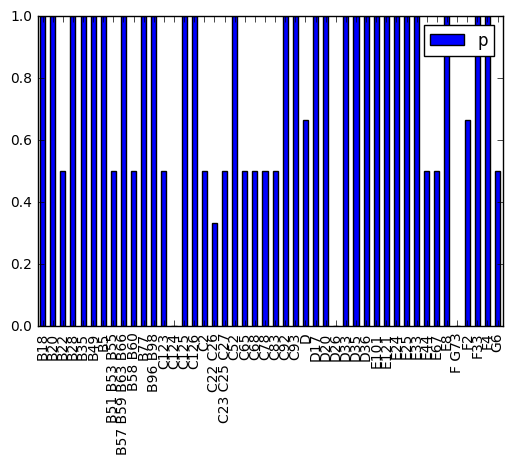

In [207]:
col = 'Cabin'
df1 = df[~pd.isnull(df.Ticket)]
cg = df1.groupby(col)
x = filter(lambda x:len(x[1]) > 1, list(cg))
d = pd.DataFrame(map(lambda x:(x[0], x[1].Survived.mean()), x))
d.index = d.iloc[:, 0].values
d = d.drop(0, axis = 1)
#print d
d.columns = ['p']
d.plot(kind='bar')
import matplotlib.pyplot as plt
plt.show()

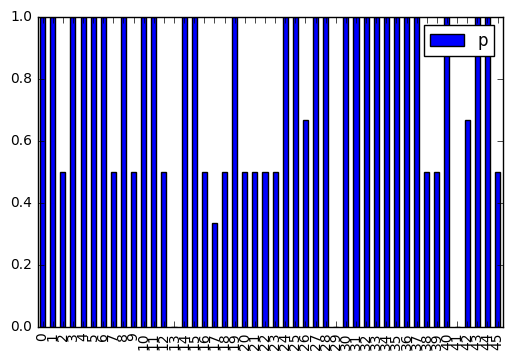

In [171]:
cg = df.groupby('Cabin')
x = filter(lambda x:len(x[1]) > 1, list(cg))
d = pd.DataFrame(map(lambda x:(x[0], x[1].Survived.mean()), x))
d.columns = ['Cabin', 'p']
d.plot(kind='bar')
import matplotlib.pyplot as plt
plt.show()